# Initialization

In [2]:
%reload_ext autoreload
%autoreload 2

import os, sys, shutil, logging
from importlib import reload

import numpy as np
import scipy as sp
import scipy.stats
import tqdm
import corner
from nose import tools

import matplotlib as mpl
import matplotlib.pyplot as plt

import kalepy as kale

# Distributions

Gaussian
SUCCESS:: PDF is unitary
SUCCESS:: PDF is non-zero over support
Box_Asym
SUCCESS:: PDF is unitary
SUCCESS:: PDF does have finite support
SUCCESS:: PDF is non-zero over support
Parabola_Asym
SUCCESS:: PDF is unitary
SUCCESS:: PDF does have finite support
SUCCESS:: PDF is non-zero over support
Triweight
SUCCESS:: PDF is unitary
SUCCESS:: PDF does have finite support
SUCCESS:: PDF is non-zero over support


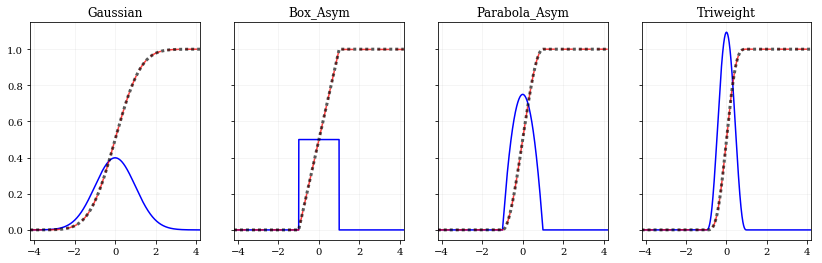

In [3]:
distribs = kale.kernels.get_all_distribution_classes()
num = len(distribs)

fig, axes = plt.subplots(figsize=[14, 4], ncols=num, sharey=True, sharex=True)
for ax in axes:
    ax.grid(alpha=0.15)

xe, xc, dx = kale.utils.bins(-5.0, 5.0, 3000)
ax.set_xlim([-4.2, 4.2])

for ax, dist in zip(axes, distribs):
    dist = dist()
    name = dist.name()
    print(name)
    ax.set_title(name)  # .__class__.__name__)
    pdf = dist.evaluate(xc)
    tot = np.trapz(pdf, x=xc)
    l1, = ax.plot(xc, pdf, 'b-')

    ax.plot(xc, np.cumsum(pdf*dx), 'r', ls=(0, [8, 4]), alpha=0.75)
    ax.plot(xc, dist.cdf(xc), 'k', ls=(0, [1, 1]), lw=3.0, alpha=0.65)

    # Make sure that the total probability is near unity
    kale.utils.allclose(tot, 1.0, rtol=1e-2, msg="PDF is {fail:}unitary")
    # Make sure distributions have the right support
    if dist.FINITE:
        outside = (xc < -1.0) | (1.0 < xc)
        inside = (-1.0 < xc) & (xc < 1.0)
        kale.utils.allclose(pdf[outside], 0.0, atol=1e-6, msg="PDF does {fail:}have finite support")
    else:
        inside = slice(None)

    kale.utils.alltrue(pdf[inside] > 0.0, msg="PDF is {fail:}non-zero over support")

        
plt.show()

Gaussian
tot = 1.0000e+00
SUCCESS:: PDF is  unitary
SUCCESS:: samples are within support
Box_Asym
tot = 1.0003e+00
SUCCESS:: PDF is  unitary
SUCCESS:: samples are within support
Parabola_Asym
tot = 1.0000e+00
SUCCESS:: PDF is  unitary
SUCCESS:: samples are within support
Triweight
tot = 1.0000e+00
SUCCESS:: PDF is  unitary
SUCCESS:: samples are within support


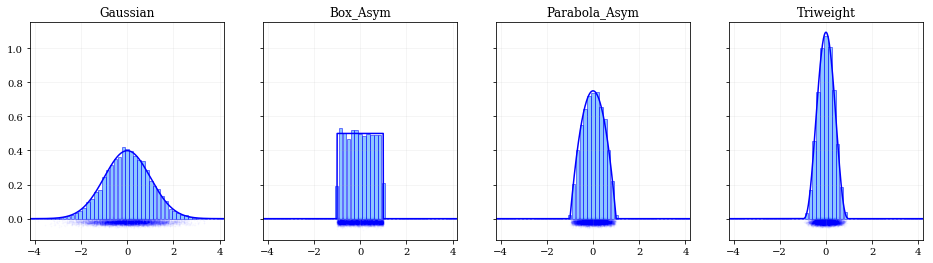

In [50]:
distribs = kale.kernels.get_all_distribution_classes()
NUM = int(1e4)

num_dist = len(distribs)
fig, axes = plt.subplots(figsize=[4*num_dist, 4], ncols=num_dist, sharey=True, sharex=True)
for ax in axes:
    ax.grid(alpha=0.15)
    ax.set_xlim([-3, 3])

xe, xc, dx = kale.utils.bins(-5.0, 5.0, 60)
ax.set_xlim([-4.2, 4.2])

fine = kale.utils.spacing(xe, 'lin', 3000)

for ax, dist in zip(axes, distribs):
    dist = dist()
    name = dist.name()
    print(name)
    ax.set_title(name)
    pdf = dist.evaluate(fine)
    l1, = ax.plot(fine, pdf, 'b-')
    tot = np.trapz(pdf, x=fine)
    print("tot = {:.4e}".format(tot))
    kale.utils.allclose(tot, 1.0, rtol=1e-3, msg="PDF is {fail:} unitary")

    samp = dist.sample(NUM)
    ax.hist(samp, bins=xe, density=True, edgecolor='b', facecolor='dodgerblue', alpha=0.5, rwidth=0.9)
    xvals = samp
    yvals = np.random.normal(-0.02, 0.01, xvals.size)
    ax.scatter(xvals, yvals, marker='.', s=2, alpha=0.02, color='b')

    # Make sure samples are in the right regions
    if dist.FINITE:
        # outside = ( < -1.0) | (1.0 < xc)
        inside = (-1.0 <= xvals) & (xvals <= 1.0)
    else:
        inside = np.ones_like(xvals, dtype=bool)

    kale.utils.alltrue(inside, msg="samples are {fail:}within support")

    
plt.show()

In [72]:
kern = kale.kernels.Triweight()

# NUM_BINS = 30
# for nd in range(1, 5):
#     edges = [np.linspace(-1.1, 1.1, NUM_BINS+1) for ii in range(nd)]
#     pdf = kern.grid(edges)
#     print("\n", kern, "ndim = {}".format(nd))
#     print(np.shape(pdf))
#     tot_1 = kale.utils.trapz_nd(pdf, edges)
#     pmf = kale.utils.trapz_dens_to_mass(pdf, edges)
#     tot_2 = np.sum(pmf)
#     print("{:.4e}  {:.4e}".format(tot_1, tot_2))


# NUM_BINS = 30
NUM_DIMS = 3
NUM_BINS = [10, 30, 100, 300]
totals = []
for nbins in NUM_BINS:
    edges = [np.linspace(-1.1, 1.1, nbins+1) for ii in range(NUM_DIMS)]
    pdf = kern.grid(edges)
    print("\n", kern.name, "| ndim = {}".format(NUM_DIMS))
    print(np.shape(pdf))
    tot_1 = kale.utils.trapz_nd(pdf, edges)
    print("{:.4e}".format(tot_1))
    totals.append(tot_1)


 <bound method Distribution.name of <class 'kalepy.kernels.Triweight'>> | ndim = 5
(11, 11, 11)
6.9804e-01

 <bound method Distribution.name of <class 'kalepy.kernels.Triweight'>> | ndim = 5
(31, 31, 31)
6.9813e-01

 <bound method Distribution.name of <class 'kalepy.kernels.Triweight'>> | ndim = 5
(101, 101, 101)
6.9813e-01

 <bound method Distribution.name of <class 'kalepy.kernels.Triweight'>> | ndim = 5
(301, 301, 301)
6.9813e-01


KeyboardInterrupt: 

[None, None]

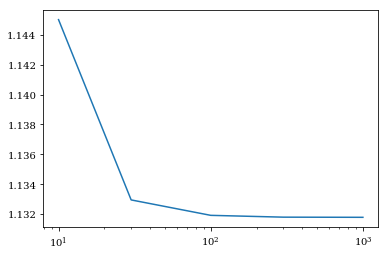

In [64]:
plt.plot(NUM_BINS, totals)
plt.gca().set(xscale='log', yscale='linear')

Gaussian
pdf.shape =  (3000, 3000)
xproj.shape =  (3000,)
pmf.shape =  (2999, 2999)
SUCCESS:: PDF is unitary
SUCCESS:: PDF is non-zero over support
Box_Asym
pdf.shape =  (3000, 3000)
xproj.shape =  (3000,)
pmf.shape =  (2999, 2999)


/Users/lzkelley/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


SUCCESS:: PDF is unitary
SUCCESS:: PDF does have finite support
SUCCESS:: PDF is non-zero over support
Parabola_Asym
pdf.shape =  (3000, 3000)
xproj.shape =  (3000,)
pmf.shape =  (2999, 2999)


ERROR:root:bads : [0]
ERROR:root:left : [1.13e+00]
ERROR:root:right: 1.0


AssertionError: FAILURE:: PDF is not unitary!

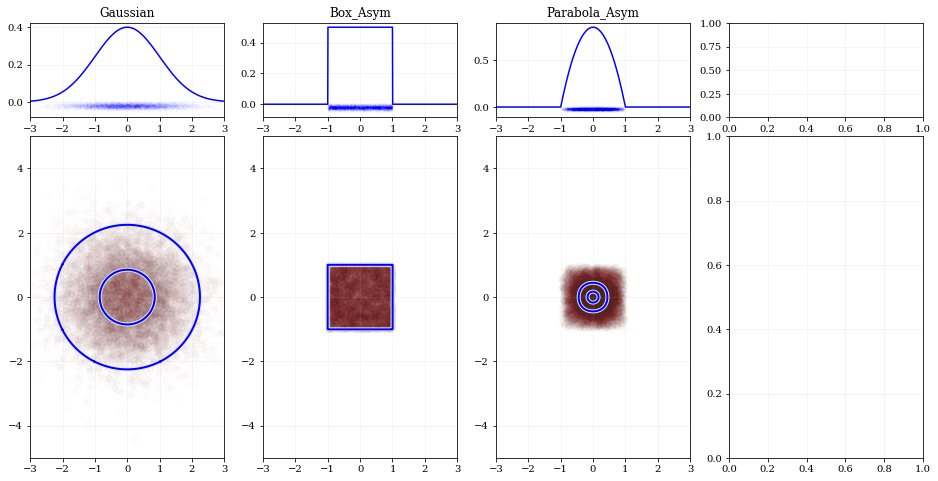

In [51]:
distribs = kale.kernels.get_all_distribution_classes()
NUM = int(1e5)
LEV = 4
bin_extr = [-5, 5]
ax_extr = [-3, 3]

num_dists = len(distribs)

gs = mpl.gridspec.GridSpec(4, num_dists)
fig = plt.figure(figsize=[4*num_dists, 8])
axes = np.empty((2, num_dists), dtype=object)
for ii, jj in np.ndindex(axes.shape):
    xx = slice(0, 1, None) if ii == 0 else slice(1, 4, None)
    prev = axes[0, jj] if ii > 0 else None
    axes[ii, jj] = plt.subplot(gs[xx, jj], sharex=prev)
    axes[ii, jj].grid(alpha=0.15)
    
xe, xc, dx = kale.utils.bins(*bin_extr, 1000)
ye, yc, dy = kale.utils.bins(*bin_extr, 1000)

edges = [xe, ye]
# areas = dx[:, np.newaxis] * dy[np.newaxis, :]
percs = sp.stats.norm.cdf([1.0, 2.0])
xg, yg = np.meshgrid(xc, yc)
grid = [xg.flatten(), yg.flatten()]

for axcol, dist in zip(axes.T, distribs):
    dist = dist()
    name = dist.name()
    print("\n", name)
    
    pdf_e = dist.grid([xe, ye])
    pdf_c = dist.grid([xc, yc])
    print("pdf.shape = ", np.shape(pdf_e))  # , "areas.shape = ", np.shape(areas))
    pdf_e_xproj = np.trapz(pdf_e, x=ye, axis=-1)
    print("xproj.shape = ", np.shape(pdf_e_xproj))
    
    # pmf = pdf * areas
    pmf = kale.utils.trapz_dens_to_mass(pdf_e, edges)
    print("pmf.shape = ", np.shape(pmf))
    samp = dist.sample(NUM//10, 2)
    
    ax = axcol[0]
    ax.set_title(name)
    
    ax.plot(xe, pdf_e_xproj, 'b-')
    xvals = samp[0]
    yvals = np.random.normal(-0.02, 0.01, xvals.size)
    ax.scatter(xvals, yvals, marker='.', s=2, alpha=0.01, color='b')
    
    ax = axcol[1]
    vals = pmf
    levels = np.unique(np.percentile(vals[vals > 0], 100*np.atleast_1d(percs)))

    ax.contour(xg, yg, vals.T, levels=levels, zorder=10, linewidths=4.0, colors='0.9', alpha=1.0)
    ax.contour(xg, yg, vals.T, levels=levels, zorder=11, linewidths=2.0, colors='blue')
    ax.scatter(*samp, facecolor='firebrick', edgecolor='0.25', alpha=0.01)
    
    ax.set(xlim=ax_extr)
    
    # Tests
    # -------------
    # Make sure that the total probability is near unity
    tot = np.sum(pmf)
    kale.utils.allclose(tot, 1.0, rtol=1e-2, msg="PDF is {fail:}unitary")
    # Make sure distributions have the right support
    if dist.FINITE:
        inside = dist.inside(grid).reshape(xg.shape)
        outside = ~inside
        kale.utils.allclose(pdf_c[outside], 0.0, atol=1e-6, msg="PDF does {fail:}have finite support")
    else:
        inside = slice(None)

    kale.utils.alltrue(pdf_c[inside] > 0.0, msg="PDF is {fail:}non-zero over support")
    
    
plt.show()

In [ ]:
def kernel_at_dim_bw(kern, ndim, bw, num=1e6):
    if ndim > 3:
        raise ValueError("`ndim` = {} is too memory intensive!")
    pad = 2.0 if kern._FINITE else 4.0
    extr = [-pad*bw, pad*bw]
    num = np.power(num, 1/ndim)
    num = int(num)
    edges = np.zeros((ndim, num+1))
    cents = np.zeros((ndim, num))
    diffs = np.zeros_like(cents)
    for ii in range(ndim):
        edges[ii, :], cents[ii, :], diffs[ii, :] = kale.utils.bins(*extr, num+1)
    
    pdf_edges = kern.grid(edges, ref=np.zeros(ndim), bw=bw)
    tot = np.array(pdf_edges)
    for ii in range(ndim):
        tot = np.trapz(tot, x=edges[-1-ii])
            
    print("{} :: nd={}, bw={:.2f} : tot={:.4e}".format(
        kern.__name__, ndim, bw, tot))

    dpow = -4 + ndim
    delta = 2*np.power(10.0, np.minimum(dpow, -1))

    tools.assert_almost_equal(tot, 1.0, delta=delta)
    
    return
    
kernels = kale.kernels.get_all_distribution_classes()
num = len(kernels)

num_dims = [1, 2, 3]
bandwidths = [0.5, 1.0, 2.0, 4.0]

for kern in kernels:
    print("\nkern: ", kern)
    for ndim in num_dims:
        print("\nndim: ", ndim)
        for bw in bandwidths:
            kernel_at_dim_bw(kern, ndim, bw)

       
        

## Covariance

In [ ]:
NUM = int(1e5)
np.random.seed(9876)


sigma = [1.5, 1.5]
corr = 0.7

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]

cov = np.array(cov)
print(cov, "\n")

kernels = kale.get_all_distribution_classes()
# print(kernels)
fig, axes = plt.subplots(figsize=[15, 5], ncols=len(kernels), nrows=2)


for (ii, jj), ax in np.ndenumerate(axes):
    kern = kernels[jj]
    print(kern.__name__)

    if ii == 0:
        edges = [np.linspace(-2*ss, 2*ss, 100) for ss in sigma]
        pdf = kern.grid(edges, bw=sigma[0])
        ax.contour(*edges, pdf)
        
    else:  
        data = kern.sample(2, cov, NUM)
        data_cov = np.cov(*data)
        print("\n", ii, kern)
        print(data_cov)

        ax.scatter(*data, alpha=0.02)
        ax.axis('equal')
        ax.grid(alpha=0.2)
        ax.set_title(kern.__name__)

        assert np.allclose(data_cov, cov, rtol=1e-2), "Data covariance does not match input!"

    
plt.show()

## Resampling

In [ ]:
def resample_at_kernel_bandwidth(ax, kern, bw):
    NUM = int(1e5)
    xe, xc, dx = kale.utils.bins(-2*bw, 2*bw, 40)
    samp = kern.sample(1, bw, NUM).squeeze()
    
    hist, _ = np.histogram(samp, xe, density=True)
    pdf = kern.evaluate(xc, 0.0, bw)

    hist_cum = np.cumsum(hist*dx)
    hist_cum = np.append([0.0], hist_cum)
    cdf = kern.cdf(xe, bw=bw)
    
    ax.hist(samp, xe, histtype='step', color='b', density=True)
    ax.plot(xc, pdf, color='b', ls='--')
    
    ax.plot(xe, hist_cum, color='r', ls='-')
    ax.plot(xe, cdf, color='r', ls='--')
    
    for aa, bb, name in zip([hist, hist_cum], [pdf, cdf], ['pdf', 'cdf']):
        idx = (aa > 0.0) & (bb > 0.0)
        dof = np.count_nonzero(idx) - 1
        x2 = np.sum(np.square(aa[idx] - bb[idx])/bb[idx]**2)
        x2 = x2 / dof        
        print("Kernel: {}, bw: {:.2e} :: {} : x2/dof = {:.4e}".format(kern.__name__, bw, name, x2))
        print("\t" + kale.utils.array_str(aa[idx]))
        print("\t" + kale.utils.array_str(bb[idx]))
        tools.assert_true(x2 < 1e-2)
        
    return


bandwidths = [0.5, 2.0]  #, 2.0]
colors = ['r', 'b']  # , 'g']

# kernels = kale.get_all_distribution_classes()
kernels = []
fig, axes = plt.subplots(figsize=[14, 6], ncols=len(kernels), nrows=len(bandwidths))
    
for (ii, jj), ax in np.ndenumerate(axes):
    kern = kernels[ii]
    bw = bandwidths[jj]
    resample_at_kernel_bandwidth(ax, kern, bw)

plt.show()

# Particular Kernels

## Box / Puck

[-0.99822617  0.99929408]
[-1.71519485  1.71702978]
[-0.99026821  0.9913276 ]


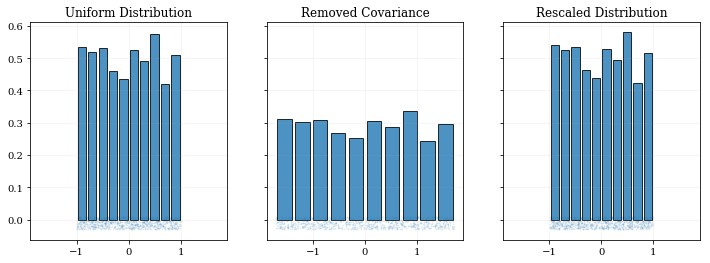

In [11]:
size = int(1e3)
ndim = 1

fig, axes = plt.subplots(figsize=[12, 4], ncols=3, sharex=True, sharey=True)
for ax in axes:
    ax.grid(alpha=0.15)  

def plot(ax, ss, title):  
    ax.set_title(title)
    xvals = ss.squeeze()
    yvals = np.random.uniform(-0.03, 0.01, xvals.size)
    ax.scatter(xvals, yvals, marker='.', s=2, alpha=0.1)
    ax.hist(xvals, density=True, rwidth=0.8, alpha=0.8, edgecolor='k')    
    return
    
# Draw samples from distribution
samps = np.random.uniform(-1.0, 1.0, size=ndim*size).reshape(ndim, size)
print(kale.utils.minmax(samps))

plot(axes[0], samps, "Uniform Distribution")
    
    
# Remove covariance
samp_cov = np.cov(*samps)
samps = kale.utils.rem_cov(samps, samp_cov)
print(kale.utils.minmax(samps))

plot(axes[1], samps, "Removed Covariance")


# Rescale Distribution
samps = samps * np.sqrt(1/3)
print(kale.utils.minmax(samps))

plot(axes[2], samps, "Rescaled Distribution")


plt.show()

[-0.99999834  0.99996624]
cov =  [[ 0.33346759 -0.00040743]
 [-0.00040743  0.33314954]]
cov =  [[1.00000000e+00 1.74084711e-18]
 [1.74084711e-18 1.00000000e+00]]
[-1.73410597  1.73396094]
[-1.00118655  1.00110282]


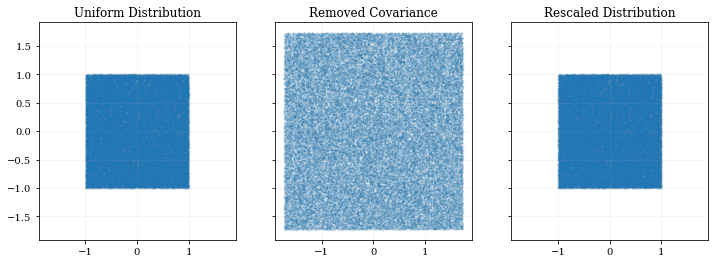

In [14]:
size = int(1e5)
ndim = 2

fig, axes = plt.subplots(figsize=[12, 4], ncols=3, sharex=True, sharey=True)
for ax in axes:
    ax.grid(alpha=0.15)  

def plot(ax, ss, title):  
    ax.set_title(title)
    ax.scatter(*ss, marker='.', s=2, alpha=0.1)
    # ax.hist(xvals, density=True, rwidth=0.8, alpha=0.8, edgecolor='k')    
    return
    
# Draw samples from distribution
samps = np.random.uniform(-1.0, 1.0, size=ndim*size).reshape(ndim, size)
print(kale.utils.minmax(samps))

plot(axes[0], samps, "Uniform Distribution")
    
    
# Remove covariance
samp_cov = np.cov(*samps)
print("cov = ", samp_cov)
samps = kale.utils.rem_cov(samps, samp_cov)
print("cov = ", np.cov(*samps))
print(kale.utils.minmax(samps))

plot(axes[1], samps, "Removed Covariance")


# Rescale Distribution
samps = samps * np.sqrt(1/3)
print(kale.utils.minmax(samps))

plot(axes[2], samps, "Rescaled Distribution")


plt.show()

## Epanechnikov (Parabola)

### Show that the median method is the same as CDF inversion 

In [ ]:
def draw_invert(size):
    xe, xc, dx = kale.utils.bins(-1.0, 1.0, 1000)
    yy = kale.kernels.Parabola.evaluate(xc)
    cs = np.cumsum(yy*dx)
    
    xc = np.concatenate([[-1.0], xc, [1.0]])
    cs = np.concatenate([[0.0], cs, [1.0]])
    
    xx = sp.interpolate.interp1d(cs, xc, kind='cubic')(np.random.uniform(0.0, 1.0, size))
    return xx

def draw_median(size):
    xx = np.random.uniform(-1, 1, 3*size).reshape(3, size)
    xx = np.median(xx, axis=0)
    return xx
    

In [ ]:
NUM = int(1e4)

aa = draw_median(NUM)
edges, cents, wids = kale.utils.bins(-1.1, 1.1, 40)

hist, _ = np.histogram(aa, edges, density=True)
cum_hist = np.cumsum(hist*wids)
pdf = kale.kernels.Parabola_Asym.evaluate(cents)
cum_pdf = np.cumsum(pdf*wids)

test = draw_median(NUM)
hist_test, _ = np.histogram(test, edges, density=True)
cum_test = np.cumsum(hist_test*wids)

plt.plot(cents, hist, 'r-')
plt.plot(cents, cum_hist, 'r--')

plt.plot(cents, hist_test, 'g-')
plt.plot(cents, cum_test, 'g--')

plt.plot(cents, pdf, 'b-')
plt.plot(cents, cum_pdf, 'b--')